In [1]:
#******************************************************************************************
#	 Title:  	program.py
# 	 Date:		1/30/2025   
#    Class:     PHYS 4130
#	
#	Purpose:    Make random diffussion structure
#******************************************************************************************
#import libraries
import numpy as np
import random as ran
import math
import matplotlib.pyplot as plt
from PIL import Image

#define function for summing neighbors
def SumNeighbors(arr, row, col):
    total = 0 
    wide = len(arr)
    height = len(arr[0])

    if 0 < row-1 < wide and 0 <= col < height:
            total += arr[row-1][col]
            
    if 0 < row+1 < wide and 0 <= col < height:
            total += arr[row+1][col]
            
    if 0 < row < wide and 0 <= col-1 < height:
            total += arr[row][col-1]

    if 0 < row < wide and 0 <= col+1 < height:
            total += arr[row][col+1]

    return round(total)

#Create a array to represent a 2D space with a stationary particle at the center
xMax=750
yMax=xMax
crystal = np.array([xMax+1,yMax+1])
crystal = np.zeros([xMax+1,yMax+1])
XCenter=round(xMax/2)
YCenter=round(yMax/2)
crystal[XCenter,YCenter]=1
Size = 10000
N=1
MaxArm = 0

while N < Size:
    #Randomly create a particle on ring
    CreationRadius = 10 + MaxArm
    DeathRadius= CreationRadius + 10
    #print("Creation Rad: ",CreationRadius)
    CreationAngle = ran.uniform(0,2*math.pi)
    x = XCenter+round(CreationRadius*math.cos(CreationAngle))
    y = YCenter+round(CreationRadius*math.sin(CreationAngle))
    #print("X: ",x-XCenter,"Y: ",y-YCenter)
    if crystal[x,y] == 1:
        attached = True
    else:
        crystal[x,y] = 1
    attached = False
    Distance = ((x-XCenter)**2 + (y-YCenter)**2)**(1/2)

    #ensure particle is in bounds
    while Distance < DeathRadius and not attached:
        Distance = ((x-XCenter)**2 + (y-YCenter)**2)**(1/2)
        #find sum of surrounding spaces 
        AdjSum = SumNeighbors(crystal, x, y) #crystal[x+1,y]+crystal[x-1,y]+crystal[x,y+1]+crystal[x,y-1]
        if AdjSum == 0:
            moveDir = ran.randint(1,4)
            if moveDir == 1:
                #move right
                #print("right")
                crystal[x,y]=0
                if y+1<yMax:
                    crystal[x,y+1] =1
                y=y+1
                
            elif moveDir == 2:
                #move down
                #print("down")
                crystal[x,y]=0
                if x+1<xMax:
                    crystal[x+1,y] =1
                x=x+1
            elif moveDir == 3:
                #move left
                #print("left")
                crystal[x,y]=0
                if y-1>0:
                    crystal[x,y-1] =1
                y=y-1

            else:
                #move up
                #print("up")
                crystal[x,y]=0
                if x-1>0:
                    crystal[x-1,y] =1
                x=x-1

        elif AdjSum > 0:
            #increment N because a particle attaches to the crystal
            N = N+1
            #print("connect")
            attached = True
            ArmLength = round(((x-XCenter)**2 + (y-YCenter)**2)**(1/2))
            #print(ArmLength)
            if ArmLength > MaxArm:
                MaxArm = ArmLength
                #print("new length: ", MaxArm)
    if Distance >= DeathRadius:
        #print("Particle dead")
        #print("X: ",x-XCenter,"Y: ",y-YCenter)
        crystal[x,y]=0


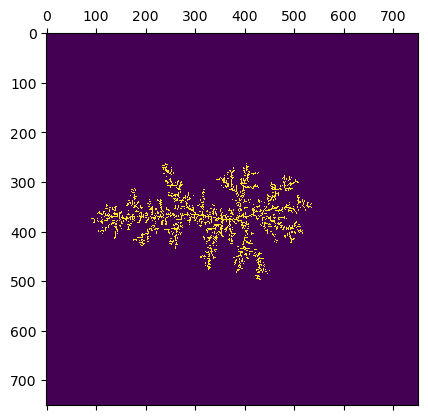

In [3]:
plt.matshow(crystal)
plt.savefig("10kP_left_arm.png")